(sec:pandas_4)=
# 판다스 실전 활용: 타이타닉 데이터셋 전처리

**주요 내용**

타이타닉<font size='2'>Titanic</font> 데이터셋을 데이터프레임으로 불러와서 전처리 하는 과정을 살펴 본다.

**기본 설정**

`pandas` 라이브러리는 보통 `pd` 라는 별칭으로 사용된다.

In [1]:
import pandas as pd
import numpy as np

랜덤 시드, 어레이 내부에 사용되는 부동소수점 정확도, 도표 크기 지정 옵션 등은 이전과 동일하다.

In [2]:
np.random.seed(12345)
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

사이킷런<font size='2'>scikit-learn</font> 라이브러리를 일부 이용한다.

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

**참고**: 

- https://jaketae.github.io/study/sklearn-pipeline/

In [4]:
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X.drop(['boat', 'body', 'home.dest'], axis=1, inplace=True)

In [5]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S


In [6]:
X.isnull().any()

pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare         True
cabin        True
embarked     True
dtype: bool

In [7]:
X.isnull().sum()

pclass         0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [8]:
X.isnull().sum()/len(X) * 100

pclass       0.000000
name         0.000000
sex          0.000000
age         20.091673
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.076394
cabin       77.463713
embarked     0.152788
dtype: float64

In [9]:
X.drop(['cabin'], axis=1, inplace=True)

In [10]:
X.isnull().sum()

pclass        0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

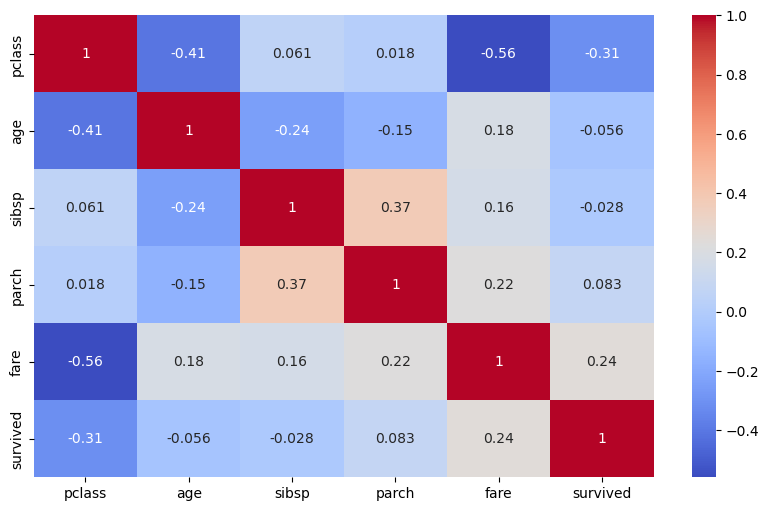

In [11]:
import pandas as pd
import seaborn as sns

X_comb = pd.concat([X, y.astype(float)], axis=1)
g = sns.heatmap(X_comb[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']].corr(),
                annot=True, 
                cmap = "coolwarm")

In [12]:
X['family_size'] = X['parch'] + X['sibsp']
X.drop(['parch', 'sibsp'], axis=1, inplace=True)
X['is_alone'] = 1
X['is_alone'].loc[X['family_size'] > 1] = 0

X.head()

C:\Users\gslee\AppData\Local\Temp\ipykernel_10952\1881273339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['is_alone'].loc[X['family_size'] > 1] = 0


,pclass,name,sex,age,ticket,fare,embarked,family_size,is_alone
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,24160,211.3375,S,0.0,1
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,113781,151.5500,S,3.0,0
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,113781,151.5500,S,3.0,0
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,113781,151.5500,S,3.0,0
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,113781,151.5500,S,3.0,0


In [13]:
X['title'] =  X['name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
X.drop(["name"], axis=1, inplace=True)

X.head()

,pclass,sex,age,ticket,fare,embarked,family_size,is_alone,title
0,1.0,female,29.0000,24160,211.3375,S,0.0,1,Miss
1,1.0,male,0.9167,113781,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,113781,151.5500,S,3.0,0,Miss
3,1.0,male,30.0000,113781,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,113781,151.5500,S,3.0,0,Mrs


In [14]:
pd.crosstab(X['title'], X['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [15]:
print(f"Miss: {np.sum(y.astype(int)[X.title == 'Miss']) / len(X.title == 'Miss')}")
print(f"Mrs: {np.sum(y.astype(int)[X.title == 'Mrs']) / len(X.title == 'Mrs')}")

Miss: 0.13445378151260504
Mrs: 0.11841100076394194


In [16]:
rare_titles = (X['title'].value_counts() < 10)
rare_titles

Mr              False
Miss            False
Mrs             False
Master          False
Rev              True
Dr               True
Col              True
Mlle             True
Ms               True
Major            True
Capt             True
Sir              True
Dona             True
Jonkheer         True
the Countess     True
Don              True
Mme              True
Lady             True
Name: title, dtype: bool

In [17]:
X.title.loc[X.title == 'Miss'] = 'Mrs'
X['title'] = X.title.apply(lambda x: 'rare' if rare_titles[x] else x)

C:\Users\gslee\AppData\Local\Temp\ipykernel_10952\434893034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.title.loc[X.title == 'Miss'] = 'Mrs'


In [18]:
X.drop('ticket', axis=1, inplace=True)

X.head()

,pclass,sex,age,fare,embarked,family_size,is_alone,title
0,1.0,female,29.0000,211.3375,S,0.0,1,Mrs
1,1.0,male,0.9167,151.5500,S,3.0,0,Master
2,1.0,female,2.0000,151.5500,S,3.0,0,Mrs
3,1.0,male,30.0000,151.5500,S,3.0,0,Mr
4,1.0,female,25.0000,151.5500,S,3.0,0,Mrs


In [19]:
X.dtypes

pclass          float64
sex            category
age             float64
fare            float64
embarked       category
family_size     float64
is_alone          int64
title            object
dtype: object

**참고**: 

- https://www.jcchouinard.com/classification-machine-learning-project-in-scikit-learn/

**참고**: 

- https://medium.datadriveninvestor.com/implementation-of-data-preprocessing-on-titanic-dataset-6c553bef0bc6